# Ensemble Machine Learning Algorithms in Python with scikit-learn

## Combine Model Predictions Into Ensemble Predictions


# Breast Cancer Wisconsin (Diagnostic)

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
# here we will import the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
import missingno as ms
%matplotlib inline
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.cross_validation import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model
# Any results you write to the current directory are saved as output.
# dont worry about the error if its not working then insteda of model_selection we can use cross_validation

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
dataset = pd.read_csv("data.csv")

## colunms specifications



In this problem we have to use 30 different columns and we have to predict the Stage of Breast Cancer M (Malignant) and B (Bengin)
This analysis has been done using Basic Machine Learning Algorithm with detailed explanation
This is good for beginners like as me Lets start.
4.Attribute Information:

1) ID number

2) Diagnosis (M = malignant, B = benign)

-3-32.Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g). concavity (severity of concave portions of the contour)

h). concave points (number of concave portions of the contour)

i). symmetry

j). fractal dimension ("coastline approximation" - 1)

5 here 3- 32 are divided into three parts first is Mean (3-13), Stranded Error(13-23) and Worst(23-32) and each contain 10 parameter (radius, texture,area, perimeter, smoothness,compactness,concavity,concave points,symmetry and fractal dimension)

Here Mean means the means of the all cells, standard Error of all cell and worst means the worst cell

In [3]:
# have a look at the data
print(dataset.head(2))

       id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  842302         M        17.99         10.38           122.8     1001.0   
1  842517         M        20.57         17.77           132.9     1326.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   

      ...       texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0     ...               17.33            184.6      2019.0            0.1622   
1     ...               23.41            158.8      1956.0            0.1238   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   

   fractal_dimension_worst  Unnamed: 32  
0              

In [5]:
# now we can drop this column Unnamed: 32
dataset.drop("Unnamed: 32",axis=1,inplace=True) # in this process this will change in our data itself 
# if you want to save your old data then you can use below code
# data1=data.drop("Unnamed:32",axis=1)
# here axis 1 means we are droping the column

### Column names

In [6]:
dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
# Creating Backup of Data
backup=dataset.copy()

In [8]:
dataset.drop("id",axis=1,inplace=True)

In [9]:
dataset['diagnosis']=dataset['diagnosis'].map({'M':1,'B':0})


### Missing values of Dataset

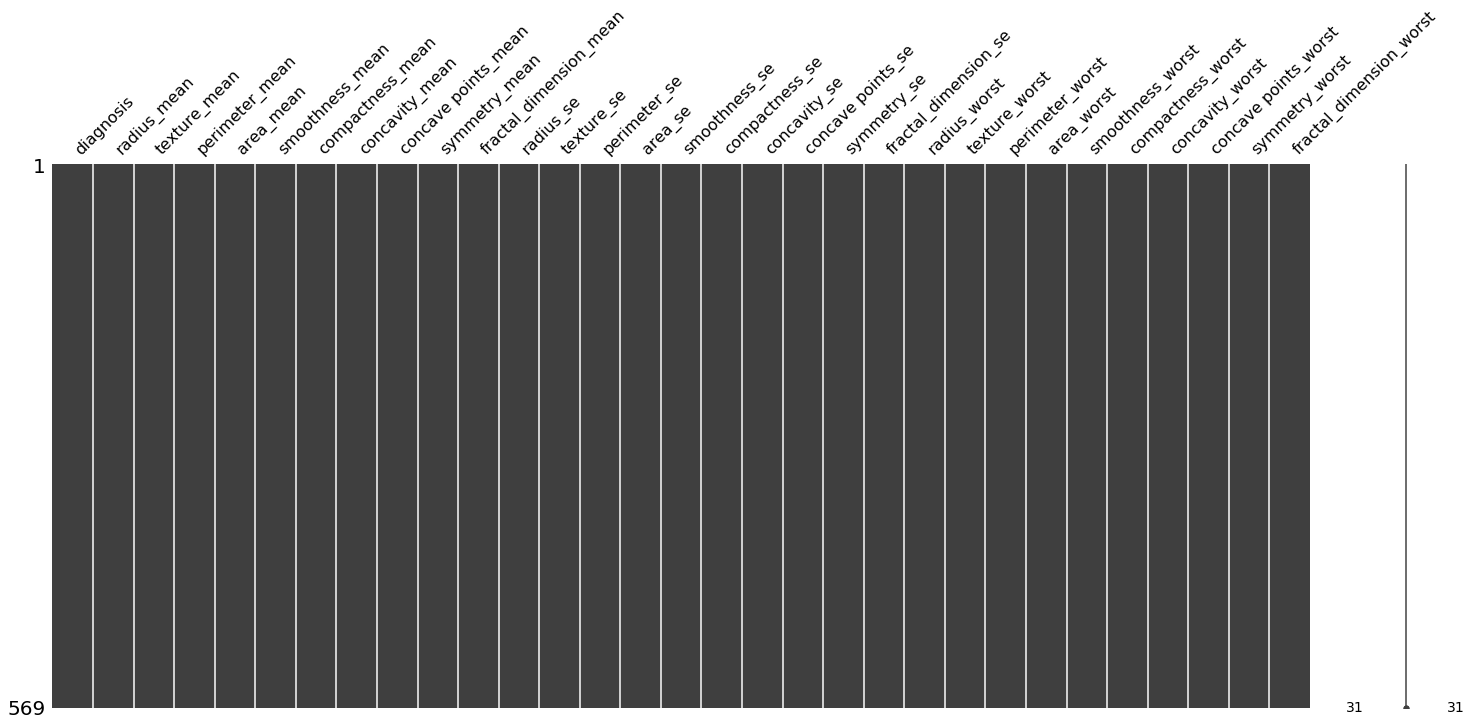

In [10]:
ms.matrix(dataset)

### Explore the Data now


In [11]:
### Explore the Data now
dataset.describe() 

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


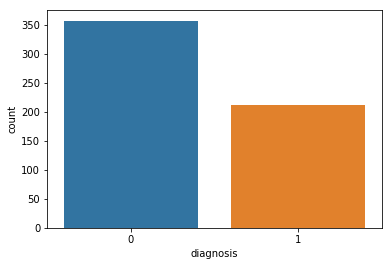

In [12]:
sns.countplot(dataset['diagnosis'],label="Count")

### Data Analysis for feature selection


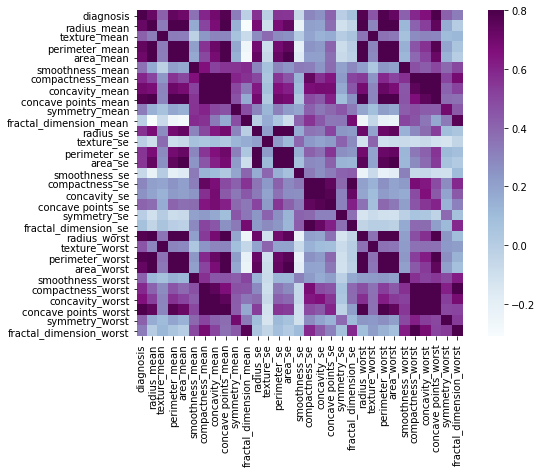

In [13]:
# Print correlation matrix
matrix = dataset.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

### correlation matrix is very complex to understand or analaysis so there is an alternative 

In [14]:
# As I said above the data can be divided into three parts.lets divied the features according to their category
features_mean= list(dataset.columns[1:11])
features_se= list(dataset.columns[11:20])
features_worst=list(dataset.columns[21:31])
print(features_mean)
print("-----------------------------------")
print(features_se)
print("------------------------------------")
print(features_worst)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
-----------------------------------
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se']
------------------------------------
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


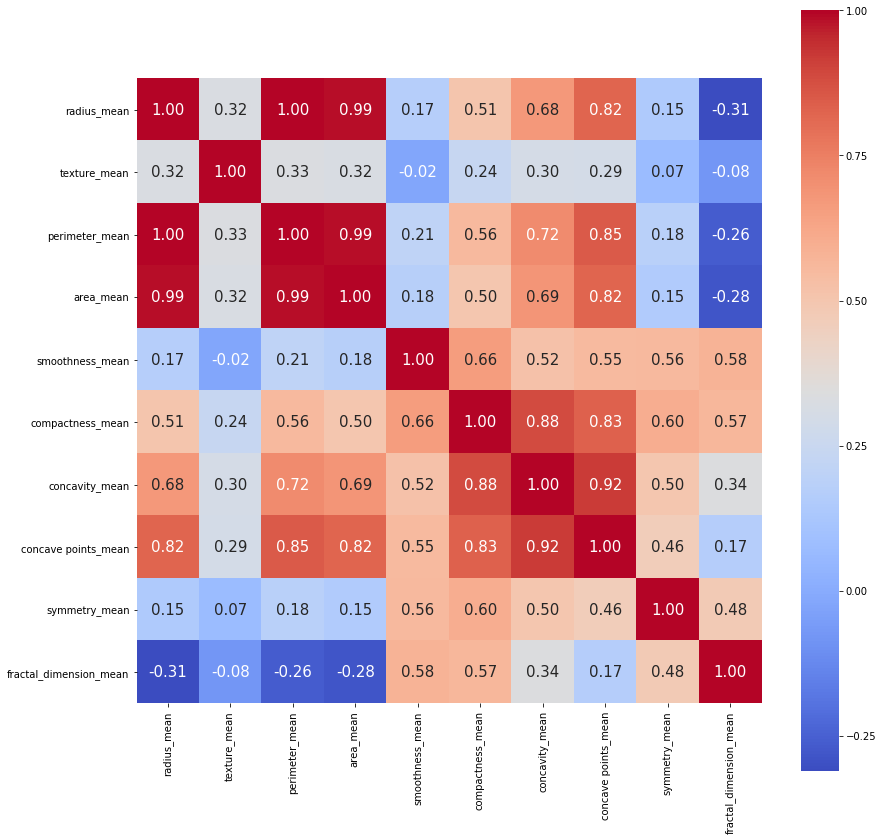

In [15]:
corr = dataset[features_mean].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm')

observation

the radius, parameter and area are highly correlated as expected from their relation,so from these we will use anyone of them
compactness_mean, concavity_mean and concavepoint_mean are highly correlated,so we will use compactness_mean from here
so selected Parameter for use is perimeter_mean, texture_mean, compactness_mean, symmetry_mean*

In [16]:
prediction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']
# now these are the variables which will use for prediction

In [17]:
#now split our data into train and test
train, test = train_test_split(dataset, test_size = 0.3)# in this our main data is splitted into train and test
# we can print dimension
print(train.shape)
print(test.shape)

(398, 31)
(171, 31)


In [18]:
train_X = train[prediction_var]# taking the training data input 
train_y=train.diagnosis# This is output of our training data

test_X= test[prediction_var] # taking test data inputs
test_y =test.diagnosis   #output value of test dat

In [19]:
model=RandomForestClassifier(n_estimators=100)# a simple random forest model


In [20]:
model.fit(train_X,train_y)# now fit our model for traiing data

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
prediction=model.predict(test_X)

In [22]:
metrics.accuracy_score(prediction,test_y) # to check the accuracy
# here we will use accuracy measurement between our predicted value and our test output values

0.935672514619883

Here the Accuracy for our model is 91 % which seems good*


In [23]:
# lets now try with SVM
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9005847953216374

SVM is giving only 0.85 which we can improve by using different techniques i will improve it till then beginners can understand how to model a data and they can have a overview of ML

*Now lets do this for all feature_mean so that from Random forest we can get the feature which are important**



In [24]:
prediction_var = features_mean # taking all features

In [25]:
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

In [26]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9415204678362573

In [27]:
model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.8888888888888888

# first lets do with SVM and other models also using all features

In [29]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.7076023391812866

In [30]:
model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.8888888888888888

In [31]:
# as you can see the accuracy of SVM decrease very much
# now lets take only top 5 important features given by RandomForest classifier

In [32]:
prediction_var=['concave points_mean','perimeter_mean' , 'concavity_mean' , 'radius_mean','area_mean']      

In [33]:
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

In [34]:
model_rr=RandomForestClassifier(n_estimators=100)
model_rr.fit(train_X,train_y)
prediction = model_rr.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9298245614035088

In [35]:
model_svc = svm.SVC()
model_svc.fit(train_X,train_y)
prediction=model_svc.predict(test_X)
metrics.accuracy_score(prediction,test_y)


0.7368421052631579

In [36]:
model_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model_knn.fit(train_X,train_y)
prediction=model_knn.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.8830409356725146

### Combine Model Predictions Into Ensemble Predictions

#### Voting Ensemble
Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

The predictions of the sub-models can be weighted, but specifying the weights for classifiers manually or even heuristically is difficult. More advanced methods can learn how to best weight the predictions from submodels, but this is called stacking (stacked aggregation) and is currently not provided in scikit-learn.

You can create a voting ensemble model for classification using the VotingClassifier class.

The code below provides an example of combining the predictions of logistic regression, classification and regression trees and support vector machines together for a classification problem.

In [44]:
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
eclf1 = VotingClassifier(estimators=[('model_rr', model_rr), ('model_svc', model_svc), ('model_knn', model_knn)], voting='hard')
eclf1 = eclf1.fit(test_X, test_y)
prediction=eclf1.predict(test_X)
print(metrics.accuracy_score(prediction,test_y),"voting classifier hard method")

0.9941520467836257 voting classifier hard method


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [47]:
#from sklearn.metrics import classification_report
#print(classification_report(test_y,prediction , target_names=["0","1"]))

## StackingClassifier
An ensemble-learning meta-classifier for stacking.

Stacking is an ensemble learning technique to combine multiple classification models via a meta-classifier. The individual classification models are trained based on the complete training set; then, the meta-classifier is fitted based on the outputs -- meta-features -- of the individual classification models in the ensemble. The meta-classifier can either be trained on the predicted class labels or probabilities from the ensemble.

### for installation

https://github.com/rasbt/mlxtend/

download this package

python setup.py install

because in anaconda envinorment installation getting problem.

In [39]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
import numpy as np

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, test_X, test_y, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.87 (+/- 0.03) [KNN]
Accuracy: 0.93 (+/- 0.02) [Random Forest]
Accuracy: 0.91 (+/- 0.03) [Naive Bayes]
Accuracy: 0.92 (+/- 0.02) [StackingClassifier]
